<a href="https://colab.research.google.com/github/victvist/Data-Science/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
import pandas as pd

In [3]:
file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(file, header = None, encoding= 'utf-8')
print(df)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.iloc[ :50,4], df.iloc[50:100,4], df.iloc[100:,4]

(0     Iris-setosa
 1     Iris-setosa
 2     Iris-setosa
 3     Iris-setosa
 4     Iris-setosa
 5     Iris-setosa
 6     Iris-setosa
 7     Iris-setosa
 8     Iris-setosa
 9     Iris-setosa
 10    Iris-setosa
 11    Iris-setosa
 12    Iris-setosa
 13    Iris-setosa
 14    Iris-setosa
 15    Iris-setosa
 16    Iris-setosa
 17    Iris-setosa
 18    Iris-setosa
 19    Iris-setosa
 20    Iris-setosa
 21    Iris-setosa
 22    Iris-setosa
 23    Iris-setosa
 24    Iris-setosa
 25    Iris-setosa
 26    Iris-setosa
 27    Iris-setosa
 28    Iris-setosa
 29    Iris-setosa
 30    Iris-setosa
 31    Iris-setosa
 32    Iris-setosa
 33    Iris-setosa
 34    Iris-setosa
 35    Iris-setosa
 36    Iris-setosa
 37    Iris-setosa
 38    Iris-setosa
 39    Iris-setosa
 40    Iris-setosa
 41    Iris-setosa
 42    Iris-setosa
 43    Iris-setosa
 44    Iris-setosa
 45    Iris-setosa
 46    Iris-setosa
 47    Iris-setosa
 48    Iris-setosa
 49    Iris-setosa
 Name: 4, dtype: object, 50    Iris-versicolor
 51

In [7]:
#%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 

y = df.iloc[0:100,4].values 
y = np.where(y == 'Iris-setosa', 0, 1) 
X = df.iloc[0:100, [0, 2]].values

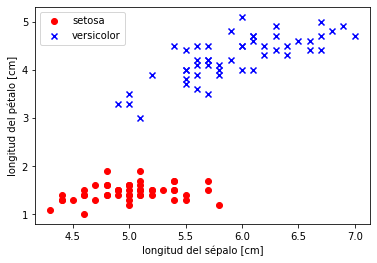

In [8]:
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label='versicolor')

plt.xlabel('longitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')

plt.show()

## **Perceptrón**

In [9]:
class Perceptron(object):

  def __init__(self, eta = 0.01, epochs = 50, seed = 1):
    self.eta = eta
    self.epochs = epochs
    self.seed = seed

  def fit(self, X, y): 
    rgen = np.random.RandomState(self.seed)
    self.w = rgen.normal(loc = 0.0, scale=0.01, size = X.shape[1]) #Lista con dos elementos
    self.b = rgen.normal(loc = 0.0, scale=0.01, size = 1) #Lista con un elemento
    self.errors = []

    for _ in range(self.epochs): #Criterio de paro
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w[:] = self.w[:] + update * xi
        #self.w[:] += update * xi
        #self.b += update
        self.b = self.b + update
        errors = errors + int(update != 0.0)
        #errors += int(update != 0.0)
      self.errors.append(errors)

    return self #Fin de la función fit

  def net_input(self, X):
    #Calculamos la entrada neta
    return np.dot(X, self.w[:]) + self.b
    
  def predict(self, X):
    #Realizamos la predicción
    return np.where(self.net_input(X) >= 0.0, 1, 0)

Text(0, 0.5, 'Número de actualizaciones/errores')

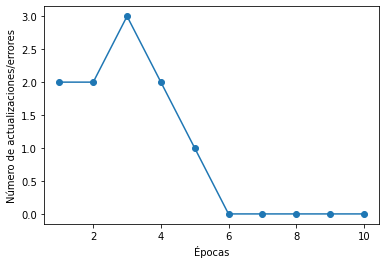

In [10]:
perceptron = Perceptron(eta = 0.1, epochs = 10)
perceptron.fit(X, y)

plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker = 'o')
plt.xlabel("Épocas")
plt.ylabel("Número de actualizaciones/errores")

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

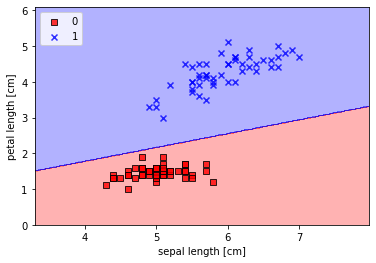

In [13]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()